<a href="https://colab.research.google.com/github/CHYaswanth/SVHN-Image-classification/blob/master/SVHN_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.2.0'

#### Checking GPU allotment

In [15]:
from tensorflow import keras
tf.test.gpu_device_name()

'/device:GPU:0'

#### Mounting Drive

In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Loading the DataSet

In [3]:
import h5py
import numpy as np

#open file as readonly
h5f = h5py.File('/content/drive/My Drive/Neural Net Project/SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [0]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

#close file
h5f.close()

In [5]:
print('X train shape : ', X_train.shape)
print('y train shape : ', y_train.shape)
print('\n')

print('X val shape : ', X_val.shape)
print('y val shape : ', y_val.shape)
print('\n')

print('X test shape : ', X_test.shape)
print('y test shape : ', y_test.shape)
print('\n')

X train shape :  (42000, 32, 32)
y train shape :  (42000,)


X val shape :  (60000, 32, 32)
y val shape :  (60000,)


X test shape :  (18000, 32, 32)
y test shape :  (18000,)




### Visualizing the DataSet

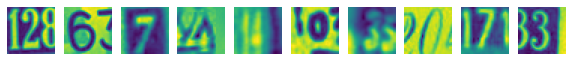

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# visualizing the first 10 images in the Train set and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

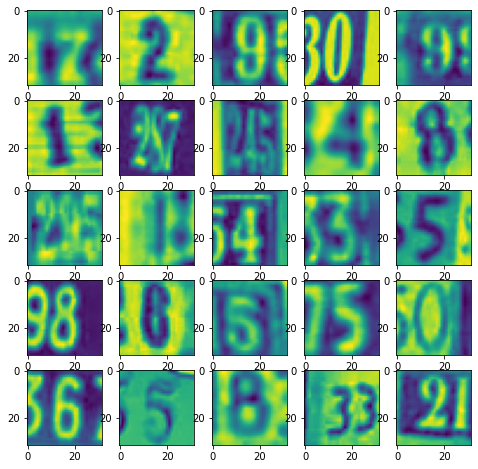

In [7]:
# visualizing the test set images
fig=plt.figure(figsize=(8, 8))
columns=5
rows=5
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

### Data PreProcessing

In [0]:
# Changing dimensions to N x D = 32x32

X_tr = X_train.reshape(len(X_train), X_train.shape[1] * X_train.shape[2])
X_te = X_test.reshape(len(X_test), X_test.shape[1] * X_test.shape[2])
X_va = X_val.reshape(len(X_val), X_val.shape[1] * X_val.shape[2])

In [9]:
print('Shapes of test/train/validation sets:')
print('Test :', X_tr.shape)
print('Test :', X_te.shape)
print('Test :', X_va.shape)

Shapes of test/train/validation sets:
Test : (42000, 1024)
Test : (18000, 1024)
Test : (60000, 1024)


In [0]:
# normalizing input from 0-255 to 0-1

X_tr = X_tr / 255.0
X_te = X_te / 255.0
X_val = X_val /255.0

In [0]:
# converting y data into categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical

y_tr = to_categorical(y_train)
y_te = to_categorical(y_test)
y_va = to_categorical(y_val)

In [12]:
print('Final Shape of the train/test/val sets:')
print(X_tr.shape, X_te.shape, X_va.shape)
print(y_tr.shape, y_te.shape,y_va.shape)

Final Shape of the train/test/val sets:
(42000, 1024) (18000, 1024) (60000, 1024)
(42000, 10) (18000, 10) (60000, 10)


## Useful Functions

In [0]:
# Plotting the train/ validation loss

def plot_loss(history):
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='val')
  plt.title('Loss for train/val sets')
  plt.ylabel('Loss')
  plt.xlabel(' # of epoch')
  plt.legend(loc="upper left")

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_loss'], label='val')
  plt.title('Accuracy for train/val sets')
  plt.ylabel('Accuracy')
  plt.xlabel(' # of epoch')
  plt.legend(loc="upper left")

# Basic NN

### Architecture

**Layer in Network (No.of Neurons in the layer)**  
Input Layer (1024) -> Layer 1 (500) -> Layer 2 (250) -> Layer 3 (100) -> Layer 4 (50) ->  Output Layer (10)   


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

## Fucntion for NN Model

In [0]:
def NN_model(iterations, lr, Lambda, activation, optimizer, verb=True, evaluate=False):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    output_nodes = 10
    activation_fn = activation
    opt_algo = optimizer
    returns = []

    model = Sequential()
    model.add(Dense(500, input_shape=(1024,), activation=activation_fn))
    model.add(Dense(250, activation=activation_fn))
    model.add(Dense(100, activation=activation_fn))
    model.add(Dense(50, activation=activation_fn))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    ## optimizer 1
    sgd = optimizers.SGD(lr=learning_rate)
    
    ## optimizer 2
    adam = optimizers.Adam(lr = learning_rate)

    if(opt_algo == 'SGD'):
      opt_algo = sgd
    else:
      opt_algo = adam

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    history = model.fit(X_tr, y_tr, epochs=iterations, batch_size=1000, validation_data=(X_va,y_va), verbose=1)
    returns.append(history)

    if(evaluate):
      # model evaluation
      score = model.evaluate(X_te, y_te, verbose=0)
      returns.append(score)

    return returns

## 1. Basic Neural network

lr = 0.01  
lamba = 0  
activation = 'sigmoid'  
optimizer = SGD  
model evaluation = false



Epoch 1/10
42/42 [==============================] - 1s 19ms/step - loss: 2.3440 - accuracy: 0.0997 - val_loss: 2.3211 - val_accuracy: 0.1000
Epoch 2/10
42/42 [==============================] - 1s 16ms/step - loss: 2.3125 - accuracy: 0.0997 - val_loss: 2.3071 - val_accuracy: 0.1003
Epoch 3/10
42/42 [==============================] - 1s 16ms/step - loss: 2.3049 - accuracy: 0.1005 - val_loss: 2.3037 - val_accuracy: 0.0968
Epoch 4/10
42/42 [==============================] - 1s 16ms/step - loss: 2.3031 - accuracy: 0.1017 - val_loss: 2.3029 - val_accuracy: 0.1024
Epoch 5/10
42/42 [==============================] - 1s 16ms/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 6/10
42/42 [==============================] - 1s 16ms/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0960
Epoch 7/10
42/42 [==============================] - 1s 16ms/step - loss: 2.3026 - accuracy: 0.1014 - val_loss: 2.3027 - val_accuracy: 0.0999
Epoch 8/10
42

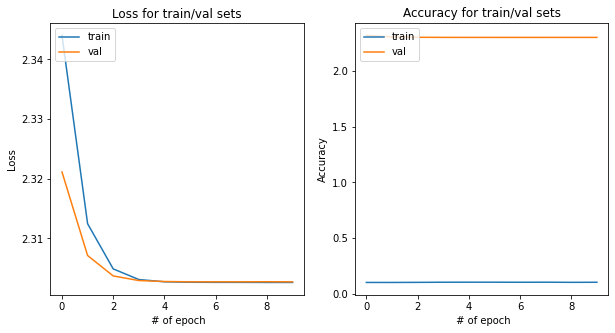

In [35]:
basic_NN = NN_model(10, 0.01, 0, activation='sigmoid', optimizer='SGD')

history = basic_NN[0]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_loss(history)

plt.subplot(1,2,2)
plot_accuracy(history)
plt.show()